# 서포트 벡터 머신_연습

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [30]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/HMEQ.csv", encoding='euc-kr')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [31]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [32]:
df_raw["JOB"].fillna("OTHER", inplace=True)

In [33]:
df_raw.fillna(df_raw.mean(), inplace=True)

In [34]:
df_raw_x=df_raw.drop("BAD", axis=1, inplace=False)

In [35]:
df_raw_y=df_raw["BAD"]

In [36]:
display("설명변수:",df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


'목표변수:'

0    1
1    1
2    0
3    1
4    0
Name: BAD, dtype: int64

In [37]:
df_raw_x_char= df_raw_x.select_dtypes(include="object")

In [38]:
df_x_dummy=pd.get_dummies(df_raw_x_char)

In [39]:
df_x_dummy.head()

,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_OTHER,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0


In [40]:
display("Dummy 변환 전:",df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,REASON,JOB
0,HomeImp,Other
1,HomeImp,Other
2,HomeImp,Office
3,HomeImp,Mgr
4,HomeImp,Office


'Dummy 변환 후:'

,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_OTHER,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0


In [41]:
df_raw_x_num=df_raw_x.select_dtypes(exclude="object")

In [42]:
v_feature_names=df_raw_x_num.columns

In [43]:
scaler=StandardScaler()

In [44]:
df_x_scaled=scaler.fit_transform(df_raw_x_num)
df_x_scaled=pd.DataFrame(df_x_scaled, columns=v_feature_names)

In [45]:
display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:", df_x_scaled.head())


'Scale 변환 전:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827


'Scale 변환 후:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456


In [46]:
df_x_converted= df_x_scaled.join(df_x_dummy)
display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:", df_x_converted.head())

'변환 전:'

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


'Scale/Dummy 변환 후:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_OTHER,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,0,1,0,0,0,1,0,0,0
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,0,1,0,0,0,1,0,0,0
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,0,1,0,0,1,0,0,0,0
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,0,1,1,0,0,0,0,0,0
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,0,1,0,0,1,0,0,0,0


In [48]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y,test_size=0.3, random_state=1234)
print("분할 전 Train Data:{}".format(df_train_x.shape))
print("분할 후 Test Data:{}".format(df_test_x.shape))

분할 전 Train Data:(2623, 19)
분할 후 Test Data:(1125, 19)


In [50]:
svm_uncustomized= SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 0.945
Accuracy on test set: 0.937


In [51]:
print(svm_uncustomized.get_params().keys())
print(svm_uncustomized.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 1234, True, 0.001, False])


In [52]:
train_accuracy=[]; test_accuracy=[]
para_c=[10**c for c in range(-2,3)]

for v_C in para_c :
    svm= SVC(C=v_C,random_state=6659)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

In [53]:
df_accuracy_c= pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["TrainScore"]= train_accuracy
df_accuracy_c["TestScore"]=test_accuracy
df_accuracy_c.round(3)


,C,TrainScore,TestScore
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.945,0.937
3,10.00,0.981,0.953
4,100.00,0.997,0.956


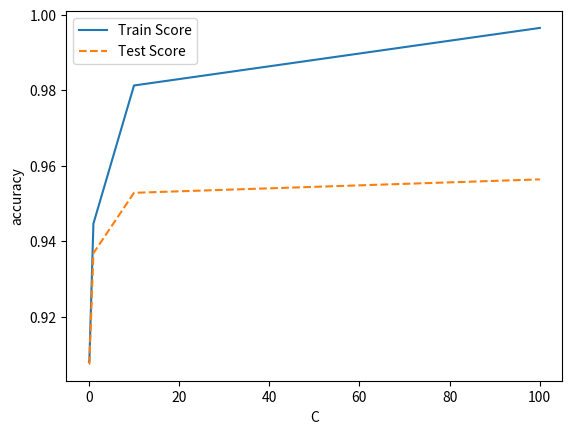

In [54]:
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_c, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("C"); plt.ylabel("accuracy")
plt.legend()

In [56]:
train_accuracy=[]; test_accuracy=[]
para_gamma=[10**gamma for gamma in range(-2,3)]

for v_gamma in para_gamma:
    svm= SVC(gamma=v_gamma,random_state=6659)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

In [58]:
df_accuracy_gamma= pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainScore"]= train_accuracy
df_accuracy_gamma["TestScore"]=test_accuracy
df_accuracy_gamma.round(3)


,gamma,TrainScore,TestScore
0,0.01,0.923,0.920
1,0.10,0.949,0.938
2,1.00,0.997,0.921
3,10.00,1.000,0.908
4,100.00,1.000,0.908


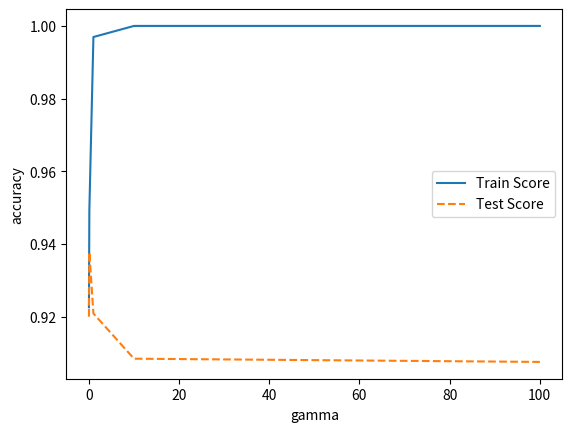

In [59]:
plt.plot(para_gamma, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_gamma, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("gamma"); plt.ylabel("accuracy")
plt.legend()

In [61]:
svc_final= SVC(gamma=0.2,C=0.8,random_state=1234)
svc_final.fit(df_train_x,df_train_y)
y_pred=svc_final.predict(df_test_x)


In [62]:
print("Train Accurary: {:.3f}".format(svc_final.score(df_train_x,df_train_y)))
print("Test Accuracy: {:.3f}".format(svc_final.score(df_test_x,df_test_y)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Train Accurary: 0.964
Test Accuracy: 0.940
Test Confusion Matrix:
[[1021    0]
 [  68   36]]
              precision    recall  f1-score   support

           0      0.938     1.000     0.968      1021
           1      1.000     0.346     0.514       104

    accuracy                          0.940      1125
   macro avg      0.969     0.673     0.741      1125
weighted avg      0.943     0.940     0.926      1125



In [64]:
estimator=SVC(random_state=1234)
param_grid={"C":para_c,"gamma":para_gamma}

grid_svc=GridSearchCV(estimator,param_grid,scoring="accuracy", n_jobs= -1)
grid_svc.fit(df_train_x,df_train_y)

print("best estimator model: \n{}".format(grid_svc.best_estimator_))
print("\nbest parameter:\n{}".format(grid_svc.best_params_))
print("\nbest score:\n{}".format(grid_svc.best_score_.round(3)))

best estimator model: 
SVC(C=100, gamma=0.1, random_state=1234)

best parameter:
{'C': 100, 'gamma': 0.1}

best score:
0.96
